In [ ]:
# 출근시간 직장인 비율이 75%일때 시뮬레이션

densities = [365 - int(365*0.75*0.01*i) for i in range(15, 56, 10)]

import numpy as np

def infected_rate(density):
    # 열차 및 시뮬레이션 설정
    passengers_per_car = density  # 한 칸당 평균 승객 수
    initial_infected_probability = 0.01  # 초기 감염자 비율 (1%)
    base_contact_probability = 0.05  # 거리 1 단위에서의 기본 접촉 빈도
    contact_transmission_probability = 0.1  # 거리 1 단위에서의 접촉당 전염 확률

    # 열차 칸 크기 (19.5m x 2.33m)
    car_length = 19.5  # 세로 길이 (m)
    car_width = 2.33   # 가로 길이 (m)


    # 거리 계산 (유클리드 거리)
    def calculate_distance(pos1, pos2):
        return np.sqrt((pos1[0] - pos2[0])**2 + (pos1[1] - pos2[1])**2)


    # 승객 수 및 2차원 위치 생성
    num_passengers = passengers_per_car
    passenger_positions = np.zeros((num_passengers,2))  # 2차원 좌표

    for i in range(num_passengers):
        while True:
            # 임의의 위치 생성
            new_position = [
                np.random.uniform(0, car_length),  # X 좌표 (0 ~ 19.5m)
                np.random.uniform(0, car_width)   # Y 좌표 (0 ~ 2.33m)
            ]
            # 기존 승객들과 최소 거리 0.3m를 만족하는지 확인
            if i == 0 or all(calculate_distance(new_position, passenger_positions[j]) >= 0.3 for j in range(i)):
                passenger_positions[i] = new_position
                break

    # 거리 효과 함수
    def distance_effect(distance):
        if distance == 0:
            return 1
        return 1 / (distance**3)

    # 초기 상태 생성
    train = np.zeros(passengers_per_car)  # 0: 비감염, 1: 감염
    infected_count = int(passengers_per_car * initial_infected_probability)
    infected_indices = np.random.choice(passengers_per_car, infected_count, replace=False)
    train[infected_indices] = 1  # 초기 감염자 설정

    # 마스크 착용 변수
    mask_wearing_rate = 0.99  # 마스크 착용률 (99%)
    mask_emission_reduction = 0.75  # 감염자가 배출하는 에어로졸 차단율 (75%)
    mask_inhalation_reduction = 0.55  # 비감염자가 흡입하는 에어로졸 차단율 (55%)

    # 감염 확률 계산
    total_transmission_probability = 0
    total_comparisons = 0
    for i in range(num_passengers):
        if train[i] == 1:  # 감염자
            for j in range(num_passengers):
                if train[j] == 0:  # 비감염자
                    distance = calculate_distance(passenger_positions[i], passenger_positions[j])
                    if distance <= 1:
                      contact_probability = distance_effect(distance) #* base_contact_probability
                      transmission_probability = contact_probability * contact_transmission_probability
                      # 마스크 착용 여부에 따른 확률 감소
                      #if np.random.rand() < mask_wearing_rate:  # 감염자가 마스크 착용 -> 감염자는 항상 마스크 착용으로 생각
                      transmission_probability *= (1 - mask_emission_reduction)

                      if np.random.rand() < mask_wearing_rate:  # 비감염자가 마스크 착용
                          transmission_probability *= (1 - mask_inhalation_reduction)

                      total_transmission_probability += transmission_probability
                      total_comparisons += 1

    # 감염 확률 평균 계산
    if total_comparisons == 0:
        return 0
    print("만약 사람이:",density,"일때는 총 비교가", total_comparisons)
    return total_transmission_probability / total_comparisons

# 시뮬레이션 반복
ir_list = np.zeros(len(densities))
num_trials = 1000 # 시행횟수

for i in range(num_trials):
    for j, density in enumerate(densities):
        ir = infected_rate(density)
        ir_list[j] += ir
    print(f"{i}/{num_trials}-epoch complete")

print("\n")

만약 사람이: 324 일때는 총 비교가 57
만약 사람이: 297 일때는 총 비교가 25
만약 사람이: 270 일때는 총 비교가 27
만약 사람이: 242 일때는 총 비교가 20
만약 사람이: 215 일때는 총 비교가 16
0/1000-epoch complete
만약 사람이: 324 일때는 총 비교가 53
만약 사람이: 297 일때는 총 비교가 37
만약 사람이: 270 일때는 총 비교가 27
만약 사람이: 242 일때는 총 비교가 20
만약 사람이: 215 일때는 총 비교가 19
1/1000-epoch complete
만약 사람이: 324 일때는 총 비교가 47
만약 사람이: 297 일때는 총 비교가 24
만약 사람이: 270 일때는 총 비교가 19
만약 사람이: 242 일때는 총 비교가 21
만약 사람이: 215 일때는 총 비교가 19
2/1000-epoch complete
만약 사람이: 324 일때는 총 비교가 43
만약 사람이: 297 일때는 총 비교가 29
만약 사람이: 270 일때는 총 비교가 29
만약 사람이: 242 일때는 총 비교가 22
만약 사람이: 215 일때는 총 비교가 26
3/1000-epoch complete
만약 사람이: 324 일때는 총 비교가 52
만약 사람이: 297 일때는 총 비교가 33
만약 사람이: 270 일때는 총 비교가 27
만약 사람이: 242 일때는 총 비교가 33
만약 사람이: 215 일때는 총 비교가 20
4/1000-epoch complete
만약 사람이: 324 일때는 총 비교가 35
만약 사람이: 297 일때는 총 비교가 31
만약 사람이: 270 일때는 총 비교가 24
만약 사람이: 242 일때는 총 비교가 22
만약 사람이: 215 일때는 총 비교가 16
5/1000-epoch complete
만약 사람이: 324 일때는 총 비교가 43
만약 사람이: 297 일때는 총 비교가 28
만약 사람이: 270 일때는 총 비교가 26
만약 사람이: 242 일때는 총 비교가 23
만약 사람이: 215 일때는 총 

In [19]:
ir_list

array([78.90360585, 76.56321092, 74.11374744, 72.66377158, 72.00116013])

In [ ]:
# 출근시간 직장인 비율이 90%일때 시뮬레이션

densities = [365 - int(365*0.90*0.01*i) for i in range(15, 56, 10)]

import numpy as np

def infected_rate(density):
    # 열차 및 시뮬레이션 설정
    passengers_per_car = density  # 한 칸당 평균 승객 수
    initial_infected_probability = 0.01  # 초기 감염자 비율 (1%)
    base_contact_probability = 0.05  # 거리 1 단위에서의 기본 접촉 빈도
    contact_transmission_probability = 0.1  # 거리 1 단위에서의 접촉당 전염 확률

    # 열차 칸 크기 (19.5m x 2.33m)
    car_length = 19.5  # 세로 길이 (m)
    car_width = 2.33   # 가로 길이 (m)


    # 거리 계산 (유클리드 거리)
    def calculate_distance(pos1, pos2):
        return np.sqrt((pos1[0] - pos2[0])**2 + (pos1[1] - pos2[1])**2)


    # 승객 수 및 2차원 위치 생성
    num_passengers = passengers_per_car
    passenger_positions = np.zeros((num_passengers,2))  # 2차원 좌표

    for i in range(num_passengers):
        while True:
            # 임의의 위치 생성
            new_position = [
                np.random.uniform(0, car_length),  # X 좌표 (0 ~ 19.5m)
                np.random.uniform(0, car_width)   # Y 좌표 (0 ~ 2.33m)
            ]
            # 기존 승객들과 최소 거리 0.3m를 만족하는지 확인
            if i == 0 or all(calculate_distance(new_position, passenger_positions[j]) >= 0.3 for j in range(i)):
                passenger_positions[i] = new_position
                break

    # 거리 효과 함수
    def distance_effect(distance):
        if distance == 0:
            return 1
        return 1 / (distance**3)

    # 초기 상태 생성
    train = np.zeros(passengers_per_car)  # 0: 비감염, 1: 감염
    infected_count = int(passengers_per_car * initial_infected_probability)
    infected_indices = np.random.choice(passengers_per_car, infected_count, replace=False)
    train[infected_indices] = 1  # 초기 감염자 설정

    # 마스크 착용 변수
    mask_wearing_rate = 0.99  # 마스크 착용률 (99%)
    mask_emission_reduction = 0.75  # 감염자가 배출하는 에어로졸 차단율 (75%)
    mask_inhalation_reduction = 0.55  # 비감염자가 흡입하는 에어로졸 차단율 (55%)

    # 감염 확률 계산
    total_transmission_probability = 0
    total_comparisons = 0
    for i in range(num_passengers):
        if train[i] == 1:  # 감염자
            for j in range(num_passengers):
                if train[j] == 0:  # 비감염자
                    distance = calculate_distance(passenger_positions[i], passenger_positions[j])
                    if distance <= 1:
                      contact_probability = distance_effect(distance) #* base_contact_probability
                      transmission_probability = contact_probability * contact_transmission_probability
                      # 마스크 착용 여부에 따른 확률 감소
                      #if np.random.rand() < mask_wearing_rate:  # 감염자가 마스크 착용 -> 감염자는 항상 마스크 착용으로 생각
                      transmission_probability *= (1 - mask_emission_reduction)

                      if np.random.rand() < mask_wearing_rate:  # 비감염자가 마스크 착용
                          transmission_probability *= (1 - mask_inhalation_reduction)

                      total_transmission_probability += transmission_probability
                      total_comparisons += 1

    # 감염 확률 평균 계산
    if total_comparisons == 0:
        return 0
    print("만약 사람이:",density,"일때는 총 비교가", total_comparisons)
    return total_transmission_probability / total_comparisons

# 시뮬레이션 반복
ir_list = np.zeros(len(densities))
num_trials = 1000 # 시행횟수

for i in range(num_trials):
    for j, density in enumerate(densities):
        ir = infected_rate(density)
        ir_list[j] += ir
    print(f"{i}/{num_trials}-epoch complete")

print("\n")

In [16]:
ir_list

array([77.8842118 , 74.99884289, 73.08418985, 71.23686197, 70.69809562])

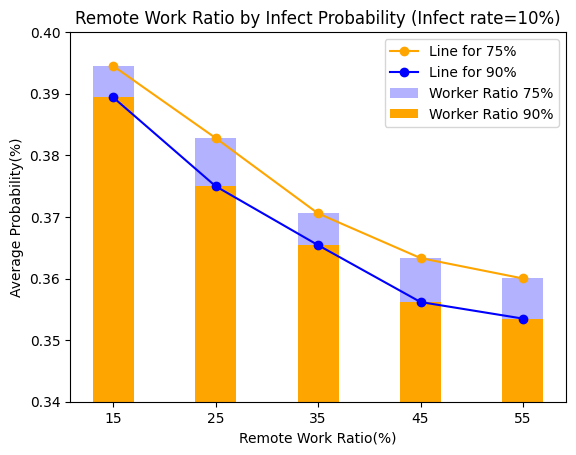

In [7]:
#시뮬레이션 결과 시각화

import matplotlib.pyplot as plt
import numpy as np

# 75%, 90%인 경우
ir_75 = [78.90360585, 76.56321092, 74.11374744, 72.66377158, 72.00116013]
ir_90 = [77.8842118, 74.99884289, 73.08418985, 71.23686197, 70.69809562]
num_trials = 1000

# 평균 계산
average_ir_75 = [(value * 0.05 / num_trials) * 100 for value in ir_75]
average_ir_90 = [(value * 0.05 / num_trials) * 100 for value in ir_90]

# x 위치 설정
densities = [365 - int(365*0.75*0.01*i) for i in range(15, 56, 10)]
x_positions = np.arange(len(densities)) * 10 + 15

plt.bar(x_positions, average_ir_75, width=4, color='blue', alpha=0.3, label='Worker Ratio 75%')
plt.bar(x_positions, average_ir_90, width=4, color='orange', alpha=1, label='Worker Ratio 90%')

plt.plot(x_positions , average_ir_75, color='orange', marker='o', label='Line for 75%')
plt.plot(x_positions, average_ir_90, color='blue', marker='o', label='Line for 90%')

plt.ylim(0.34, 0.4)
plt.xticks(x_positions, labels=[15, 25, 35, 45, 55])

plt.title("Remote Work Ratio by Infect Probability (Infect rate=10%)")
plt.xlabel("Remote Work Ratio(%)")
plt.ylabel("Average Probability(%)")
plt.legend(loc='upper right')

# 그래프 표시
plt.show()

In [ ]:
# 감염율 30%인 바이러스, 직장인 비율 90%

densities = [365 - int(365*0.90*0.01*i) for i in range(15, 56, 10)]

import numpy as np

def infected_rate(density):
    # 열차 및 시뮬레이션 설정
    passengers_per_car = density  # 한 칸당 평균 승객 수
    initial_infected_probability = 0.01  # 초기 감염자 비율 (1%)
    base_contact_probability = 0.05  # 거리 1 단위에서의 기본 접촉 빈도
    contact_transmission_probability = 0.3  # 거리 1 단위에서의 접촉당 전염 확률

    # 열차 칸 크기 (19.5m x 2.33m)
    car_length = 19.5  # 세로 길이 (m)
    car_width = 2.33   # 가로 길이 (m)


    # 거리 계산 (유클리드 거리)
    def calculate_distance(pos1, pos2):
        return np.sqrt((pos1[0] - pos2[0])**2 + (pos1[1] - pos2[1])**2)


    # 승객 수 및 2차원 위치 생성
    num_passengers = passengers_per_car
    passenger_positions = np.zeros((num_passengers,2))  # 2차원 좌표

    for i in range(num_passengers):
        while True:
            # 임의의 위치 생성
            new_position = [
                np.random.uniform(0, car_length),  # X 좌표 (0 ~ 19.5m)
                np.random.uniform(0, car_width)   # Y 좌표 (0 ~ 2.33m)
            ]
            # 기존 승객들과 최소 거리 0.3m를 만족하는지 확인
            if i == 0 or all(calculate_distance(new_position, passenger_positions[j]) >= 0.3 for j in range(i)):
                passenger_positions[i] = new_position
                break

    # 거리 효과 함수
    def distance_effect(distance):
        if distance == 0:
            return 1
        return 1 / (distance**3)

    # 초기 상태 생성
    train = np.zeros(passengers_per_car)  # 0: 비감염, 1: 감염
    infected_count = int(passengers_per_car * initial_infected_probability)
    infected_indices = np.random.choice(passengers_per_car, infected_count, replace=False)
    train[infected_indices] = 1  # 초기 감염자 설정

    # 마스크 착용 변수
    mask_wearing_rate = 0.99  # 마스크 착용률 (80%)
    mask_emission_reduction = 0.75  # 감염자가 배출하는 에어로졸 차단율 (80%)
    mask_inhalation_reduction = 0.55  # 비감염자가 흡입하는 에어로졸 차단율 (50%)

    # 감염 확률 계산
    total_transmission_probability = 0
    total_comparisons = 0
    for i in range(num_passengers):
        if train[i] == 1:  # 감염자
            for j in range(num_passengers):
                if train[j] == 0:  # 비감염자
                    distance = calculate_distance(passenger_positions[i], passenger_positions[j])
                    if distance <= 1:
                      contact_probability = distance_effect(distance) #* base_contact_probability
                      transmission_probability = contact_probability * contact_transmission_probability
                      # 마스크 착용 여부에 따른 확률 감소
                      #if np.random.rand() < mask_wearing_rate:  # 감염자가 마스크 착용
                      transmission_probability *= (1 - mask_emission_reduction)

                      if np.random.rand() < mask_wearing_rate:  # 비감염자가 마스크 착용
                          transmission_probability *= (1 - mask_inhalation_reduction)

                      total_transmission_probability += transmission_probability
                      total_comparisons += 1

    # 감염 확률 평균 계산
    if total_comparisons == 0:
        return 0
    print("만약 사람이:",density,"일때는 총 비교가", total_comparisons)
    return total_transmission_probability / total_comparisons

# 시뮬레이션 반복
ir_list = np.zeros(len(densities))
num_trials = 1000

for i in range(num_trials):
    for j, density in enumerate(densities):
        ir = infected_rate(density)
        ir_list[j] += ir
    print(f"{i}/{num_trials}-epoch complete")

print("\n")

만약 사람이: 316 일때는 총 비교가 36
만약 사람이: 283 일때는 총 비교가 34
만약 사람이: 251 일때는 총 비교가 30
만약 사람이: 218 일때는 총 비교가 19
만약 사람이: 185 일때는 총 비교가 9
0/1000-epoch complete
만약 사람이: 316 일때는 총 비교가 51
만약 사람이: 283 일때는 총 비교가 23
만약 사람이: 251 일때는 총 비교가 25
만약 사람이: 218 일때는 총 비교가 21
만약 사람이: 185 일때는 총 비교가 7
1/1000-epoch complete
만약 사람이: 316 일때는 총 비교가 44
만약 사람이: 283 일때는 총 비교가 30
만약 사람이: 251 일때는 총 비교가 31
만약 사람이: 218 일때는 총 비교가 24
만약 사람이: 185 일때는 총 비교가 12
2/1000-epoch complete
만약 사람이: 316 일때는 총 비교가 37
만약 사람이: 283 일때는 총 비교가 21
만약 사람이: 251 일때는 총 비교가 26
만약 사람이: 218 일때는 총 비교가 24
만약 사람이: 185 일때는 총 비교가 8
3/1000-epoch complete
만약 사람이: 316 일때는 총 비교가 44
만약 사람이: 283 일때는 총 비교가 32
만약 사람이: 251 일때는 총 비교가 24
만약 사람이: 218 일때는 총 비교가 23
만약 사람이: 185 일때는 총 비교가 8
4/1000-epoch complete
만약 사람이: 316 일때는 총 비교가 44
만약 사람이: 283 일때는 총 비교가 33
만약 사람이: 251 일때는 총 비교가 22
만약 사람이: 218 일때는 총 비교가 21
만약 사람이: 185 일때는 총 비교가 5
5/1000-epoch complete
만약 사람이: 316 일때는 총 비교가 31
만약 사람이: 283 일때는 총 비교가 23
만약 사람이: 251 일때는 총 비교가 27
만약 사람이: 218 일때는 총 비교가 22
만약 사람이: 185 일때는 총 비교가 1

In [23]:
ir_list

array([234.5888799 , 227.15257544, 219.87494274, 214.30184312,
       210.37477159])

In [ ]:
# 감염율 30%인 바이러스, 직장인 비율 75%

densities = [365 - int(365*0.75*0.01*i) for i in range(15, 56, 10)]

import numpy as np

def infected_rate(density):
    # 열차 및 시뮬레이션 설정
    passengers_per_car = density  # 한 칸당 평균 승객 수
    initial_infected_probability = 0.01  # 초기 감염자 비율 (1%)
    base_contact_probability = 0.05  # 거리 1 단위에서의 기본 접촉 빈도
    contact_transmission_probability = 0.3  # 거리 1 단위에서의 접촉당 전염 확률

    # 열차 칸 크기 (19.5m x 2.33m)
    car_length = 19.5  # 세로 길이 (m)
    car_width = 2.33   # 가로 길이 (m)


    # 거리 계산 (유클리드 거리)
    def calculate_distance(pos1, pos2):
        return np.sqrt((pos1[0] - pos2[0])**2 + (pos1[1] - pos2[1])**2)


    # 승객 수 및 2차원 위치 생성
    num_passengers = passengers_per_car
    passenger_positions = np.zeros((num_passengers,2))  # 2차원 좌표

    for i in range(num_passengers):
        while True:
            # 임의의 위치 생성
            new_position = [
                np.random.uniform(0, car_length),  # X 좌표 (0 ~ 19.5m)
                np.random.uniform(0, car_width)   # Y 좌표 (0 ~ 2.33m)
            ]
            # 기존 승객들과 최소 거리 0.3m를 만족하는지 확인
            if i == 0 or all(calculate_distance(new_position, passenger_positions[j]) >= 0.3 for j in range(i)):
                passenger_positions[i] = new_position
                break

    # 거리 효과 함수
    def distance_effect(distance):
        if distance == 0:
            return 1
        return 1 / (distance**3)

    # 초기 상태 생성
    train = np.zeros(passengers_per_car)  # 0: 비감염, 1: 감염
    infected_count = int(passengers_per_car * initial_infected_probability)
    infected_indices = np.random.choice(passengers_per_car, infected_count, replace=False)
    train[infected_indices] = 1  # 초기 감염자 설정

    # 마스크 착용 변수
    mask_wearing_rate = 0.99  # 마스크 착용률 (80%)
    mask_emission_reduction = 0.75  # 감염자가 배출하는 에어로졸 차단율 (80%)
    mask_inhalation_reduction = 0.55  # 비감염자가 흡입하는 에어로졸 차단율 (50%)

    # 감염 확률 계산
    total_transmission_probability = 0
    total_comparisons = 0
    for i in range(num_passengers):
        if train[i] == 1:  # 감염자
            for j in range(num_passengers):
                if train[j] == 0:  # 비감염자
                    distance = calculate_distance(passenger_positions[i], passenger_positions[j])
                    if distance <= 1:
                      contact_probability = distance_effect(distance) #* base_contact_probability
                      transmission_probability = contact_probability * contact_transmission_probability
                      # 마스크 착용 여부에 따른 확률 감소
                      #if np.random.rand() < mask_wearing_rate:  # 감염자가 마스크 착용
                      transmission_probability *= (1 - mask_emission_reduction)

                      if np.random.rand() < mask_wearing_rate:  # 비감염자가 마스크 착용
                          transmission_probability *= (1 - mask_inhalation_reduction)

                      total_transmission_probability += transmission_probability
                      total_comparisons += 1

    # 감염 확률 평균 계산
    if total_comparisons == 0:
        return 0
    print("만약 사람이:",density,"일때는 총 비교가", total_comparisons)
    return total_transmission_probability / total_comparisons

# 시뮬레이션 반복
ir_list = np.zeros(len(densities))
num_trials = 1000

for i in range(num_trials):
    for j, density in enumerate(densities):
        ir = infected_rate(density)
        ir_list[j] += ir
    print(f"{i}/{num_trials}-epoch complete")

print("\n")

In [25]:
ir_list

array([236.23048911, 228.37708655, 221.09239864, 217.76895575,
       215.26252706])

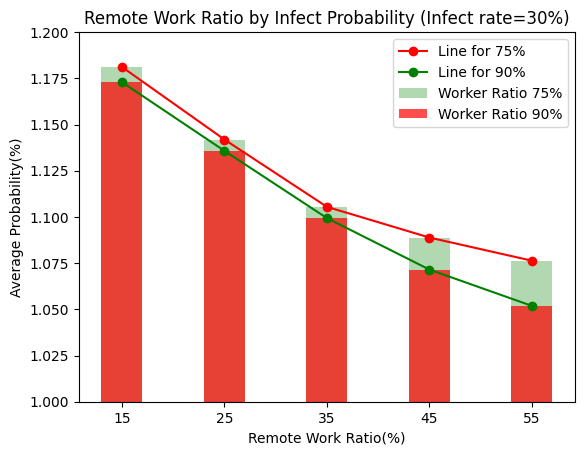

In [ ]:
import matplotlib.pyplot as plt

num_trials = 1000 # 시뮬레이션 1000회 실시
# 감염율 30%일경우, 75%, 90%인 경우
ir_75 = [236.23048911, 228.37708655, 221.09239864, 217.76895575, 215.26252706]
ir_90 = [234.5888799 , 227.15257544, 219.87494274, 214.30184312, 210.37477159]
# 평균 계산
average_ir_75 = [(value * 0.05 / num_trials) * 100 for value in ir_75]
average_ir_90 = [(value * 0.05 / num_trials) * 100 for value in ir_90]

# x 위치 설정
x_positions = np.arange(len(densities)) * 10 + 15

# 75% 데이터 막대 추가 (투명도 alpha=0.5)
plt.bar(x_positions, average_ir_75, width=4, color='green', alpha=0.3, label='Worker Ratio 75%')

# 90% 데이터 막대 추가 (불투명 alpha=1)
plt.bar(x_positions, average_ir_90, width=4, color='red', alpha=0.7, label='Worker Ratio 90%')


# 막대 위에 점과 선 추가
plt.plot(x_positions , average_ir_75, color='red', marker='o', label='Line for 75%')
plt.plot(x_positions, average_ir_90, color='green', marker='o', label='Line for 90%')

# y축 범위 설정
plt.ylim(1.0, 1.2)  # y축 범위 설정

# x축 설정: 15, 25, 35, 45, 55만 표시
plt.xticks(x_positions, labels=[15, 25, 35, 45, 55])

# 그래프 제목과 축 레이블 추가
plt.title("Remote Work Ratio by Infect Probability (Infect rate=30%)")
plt.xlabel("Remote Work Ratio(%)")
plt.ylabel("Average Probability(%)")

# 범례 추가
plt.legend(loc='upper right')

# 그래프 표시
plt.show()